In [4]:
import pandas as pd
import numpy as np

In [3]:
jt_points = pd.read_csv('joe_thornton_points_summary.csv')
jt_points

,Points,Vs_Team,Home/Away
0,0,COLORADO AVALANCHE,Away
1,2,ANAHEIM DUCKS,Away
2,3,LOS ANGELES KINGS,Away
3,4,COLUMBUS BLUE JACKETS,Home
4,1,MINNESOTA WILD,Home
5,0,PHOENIX COYOTES,Home
6,0,WASHINGTON CAPITALS,Away
7,3,NEW YORK ISLANDERS,Away
8,1,NEW YORK RANGERS,Away
9,1,TAMPA BAY LIGHTNING,Away


In [5]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

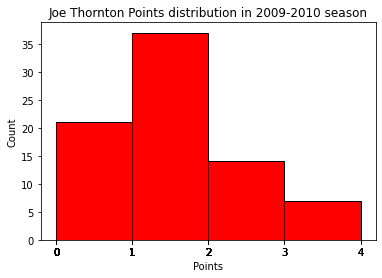

In [43]:
plt.hist(jt_points['Points'], bins=4, histtype='bar', ec='black', color ='red')
plt.xticks(jt_points['Points'])
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Joe Thornton Points distribution in 2009-2010 season')
plt.show()

In [32]:
jt_points[jt_points['Points'] == 3].count()

Points       4
Vs_Team      4
Home/Away    4
dtype: int64

In [36]:
playoff_teams = ['Washington Capitals', 'Montreal Canadiens', 'New Jersey Devils', 'Philadelphia Flyers',
                     'Buffalo Sabres', 'Boston Bruins', 'Pittsburgh Penguins', 'Ottawa Senators',
                     'Colorado Avalanche', 'Chicago Blackhawks', 'Nashville Predators', 'Vancouver Canucks',
                     'Los Angeles Kings', 'Phoenix Coyotes', 'Detroit Red Wings']
playoff_teams = list(map(lambda x: x.upper(), playoff_teams))

In [49]:
#making a dataframe of Joe Thronton's games against Playoff teams
jt_points_vs_po_teams = jt_points[jt_points['Vs_Team'].isin(playoff_teams)]
jt_points_vs_po_teams.count()

Points       41
Vs_Team      41
Home/Away    41
dtype: int64

In [53]:
#making a dataframe of Joe Thronton's games against Non-Playoff teams
jt_points_vs_nonpo_teams = jt_points[~jt_points['Vs_Team'].isin(playoff_teams)]
jt_points_vs_nonpo_teams.count()

Points       38
Vs_Team      38
Home/Away    38
dtype: int64

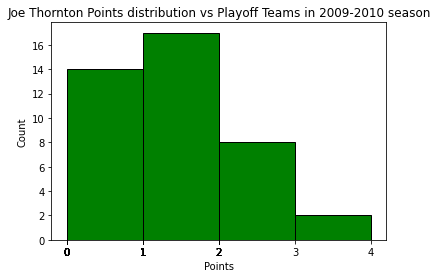

In [55]:
plt.hist(jt_points_vs_po_teams['Points'], bins=4, histtype='bar', ec='black', color ='green')
plt.xticks(jt_points_vs_po_teams['Points'])
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Joe Thornton Points distribution vs Playoff Teams in 2009-2010 season')
plt.show()

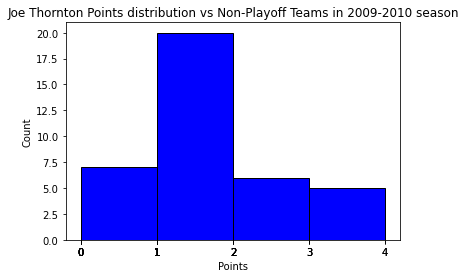

In [56]:
plt.hist(jt_points_vs_nonpo_teams['Points'], bins=4, histtype='bar', ec='black', color ='blue')
plt.xticks(jt_points_vs_nonpo_teams['Points'])
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Joe Thornton Points distribution vs Non-Playoff Teams in 2009-2010 season')
plt.show()

In [92]:
jt_points.shape

(79, 3)

In [67]:
#Getting his overall points per game
jt_ppg = jt_points['Points'].sum()/jt_points.shape[0]
jt_ppg

1.1265822784810127

In [70]:
#Getting his points per game against teams who made the playoffs
jt_ppg_vs_po_teams = jt_points_vs_po_teams['Points'].sum()/jt_points_vs_po_teams.shape[0]
jt_ppg_vs_po_teams

0.975609756097561

In [71]:
#Getting his points per game against teams didn't make the playoffs
jt_ppg_vs_nonpo_teams = jt_points_vs_nonpo_teams['Points'].sum()/jt_points_vs_nonpo_teams.shape[0]
jt_ppg_vs_nonpo_teams

1.2894736842105263

In [77]:
#In the 2009-2010 season Joe Thornton had 12 points in 15 games in the playoffs
12/15

0.8

In [78]:
import random

In [95]:
# Create a weighted probability of how likely Joe Thronton was to amass a certain number of points vs a playoff team
# Then randomly pick those to see how often he ends around 0.8 PPG in 15 games vs playoff teams

unique_points = jt_points_vs_po_teams['Points'].unique()
points_occurences = []
#Count the occurrences of each unique point total and then divide it by the total amount of games played against 
#PO teams
for i in unique_points:
    occur_rate = jt_points_vs_po_teams[jt_points_vs_po_teams['Points'] == i].shape[0]/jt_points_vs_po_teams.shape[0]
    points_occurences.append((i,occur_rate))
    
    
points_occurences

[(0, 0.34146341463414637),
 (3, 0.024390243902439025),
 (1, 0.4146341463414634),
 (2, 0.1951219512195122),
 (4, 0.024390243902439025)]

In [114]:
POPULATION = [x[0] for x in points_occurences]
POPULATION

[0, 3, 1, 2, 4]

In [100]:
WEIGHTS = [x[1] for x in points_occurences]
WEIGHTS

[0.34146341463414637,
 0.024390243902439025,
 0.4146341463414634,
 0.1951219512195122,
 0.024390243902439025]

In [140]:
#Randomly choosing point totals for 15 games(k=15) using our weighted probabilties 
# k=15 because Thornton played 15 games in the playoffs in the 09-10 season
random.choices(population=POPULATION, weights=WEIGHTS, k=15)
#It returns a list of the point totals in each of the individual 15 games

[1, 0, 0, 4, 0, 0, 2, 1, 2, 1, 1, 3, 1, 1, 1]

In [177]:
#Repeating the above 300 times (we could do it more but I just chose a 300) and collecting the sum (point total) each time
point_total = []
for i in range(300):
    x = sum(random.choices(population=POPULATION, weights=WEIGHTS, k=15))
    point_total.append(x)

In [178]:
#Finding out the mean of the point totals that were generated randomly 
point_total = np.array(point_total)
point_total.mean()

14.633333333333333

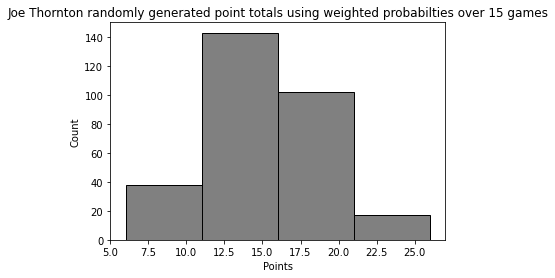

In [179]:
#Histogram of the randomly generated point totals
plt.hist(point_total, bins=4, histtype='bar', ec='black', color ='grey')
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Joe Thornton randomly generated point totals using weighted probabilties over 15 games')
plt.show()

In [191]:
#Getting how many occurences of where there was at most 12 points in 15 games 
#(point_total <= 12) returns a boolean table, and when you sum it all the True Values are added up
#Because True = 1 and False = 0
(point_total <= 12).sum()

85

In [200]:
point_total.size

300

In [201]:
(point_total <= 12).sum()/point_total.size

0.2833333333333333

We get back a 28% chance of getting a point total below or equivalent to 12 points in 15 games over a 300 size sample using his weighted point probabilties against playoff teams. This is pretty high so it shouldn't be that much of a surprise for Joe Thornton to only score that much. So even though this is well below his 92 point pace during that regular season -- we can see here that his point production in the playoffs that season is still somewhat in line of his regular season point production.